<a href="https://colab.research.google.com/github/mayumiluiza/ricks_diamond/blob/main/M%C3%B3dulo_2_Diamond_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diamond Project

**Goal**:  estimate the price of Rick’s 5000 diamonds achieving the smallest amount of error. Your goal is to create a prediction that will obtain a root mean squared error less than 9000 dollars. 

## Tools

## Importing Libs

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RANSACRegressor


# Understading the base

In [9]:
def read_from_gsheets(spreadsheet):
    """
    Transform url into csv 
    """
    working_spreadsheet = spreadsheet.replace('/edit?usp=sharing','/export?format=csv')
    
    return pd.read_csv(working_spreadsheet)


diamond_base = read_from_gsheets('https://docs.google.com/spreadsheets/d/1bfrqwcyRcfvOgnh_Hl8gUuOGhlXn0M79Z5bgJfYfBH8/edit?usp=sharing')

In [11]:
diamond_base.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [12]:
diamond_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48940 entries, 0 to 48939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    48940 non-null  float64
 1   cut      48940 non-null  object 
 2   color    48940 non-null  object 
 3   clarity  48940 non-null  object 
 4   depth    48940 non-null  float64
 5   table    48940 non-null  float64
 6   price    48940 non-null  int64  
 7   x        48940 non-null  float64
 8   y        48940 non-null  float64
 9   z        48940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.7+ MB


In [13]:
diamond_base.describe()

,carat,depth,table,price,x,y,z
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000
mean,0.797817,61.751931,57.451161,3934.409644,5.730712,5.734333,3.538648
std,0.474126,1.430026,2.233450,3989.333861,1.121920,1.145344,0.706817
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [14]:
diamond_base.corr()

<ipython-input-14-78f7ef1f1cb8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  diamond_base.corr()


,carat,depth,table,price,x,y,z
carat,1.000000,0.027074,0.181688,0.922186,0.975152,0.949687,0.951824
depth,0.027074,1.000000,-0.297123,-0.012037,-0.025858,-0.029903,0.094344
table,0.181688,-0.297123,1.000000,0.127832,0.195367,0.183362,0.150646
price,0.922186,-0.012037,0.127832,1.000000,0.885019,0.864059,0.860247
x,0.975152,-0.025858,0.195367,0.885019,1.000000,0.972447,0.969336
y,0.949687,-0.029903,0.183362,0.864059,0.972447,1.000000,0.948768
z,0.951824,0.094344,0.150646,0.860247,0.969336,0.948768,1.000000


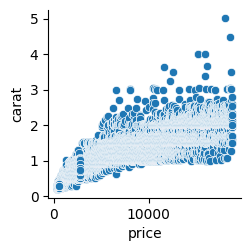

In [20]:
sns.pairplot(data=diamond_base, x_vars='price',y_vars='carat')

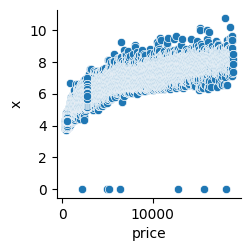

In [21]:
sns.pairplot(data=diamond_base, x_vars='price',y_vars='x')

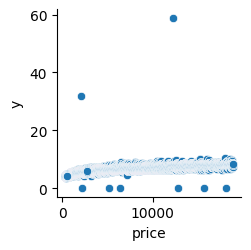

In [22]:
sns.pairplot(data=diamond_base, x_vars='price',y_vars='y')

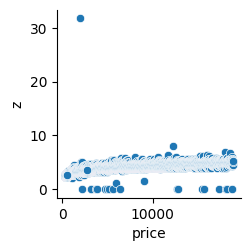

In [23]:
sns.pairplot(data=diamond_base, x_vars='price',y_vars='z')

## Data Organization

In [71]:
diamond_clean = diamond_base.loc[~((diamond_base["x"] == 0) | (diamond_base["y"] == 0) | (diamond_base["z"] == 0))]
diamond_clean

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
48935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
48936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
48937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
48938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56


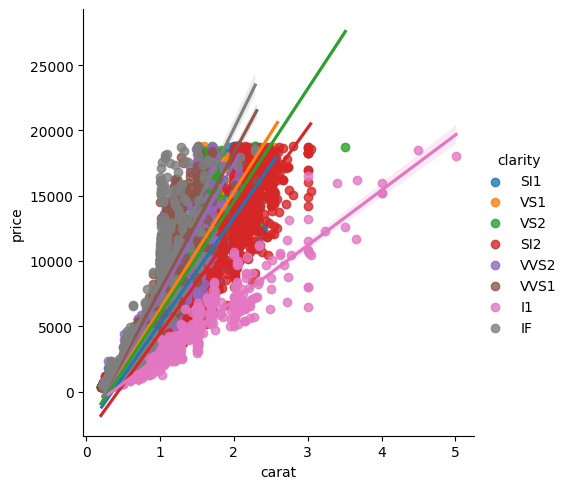

In [76]:
sns.lmplot(x='carat',y='price', data=diamond_base, hue='clarity')

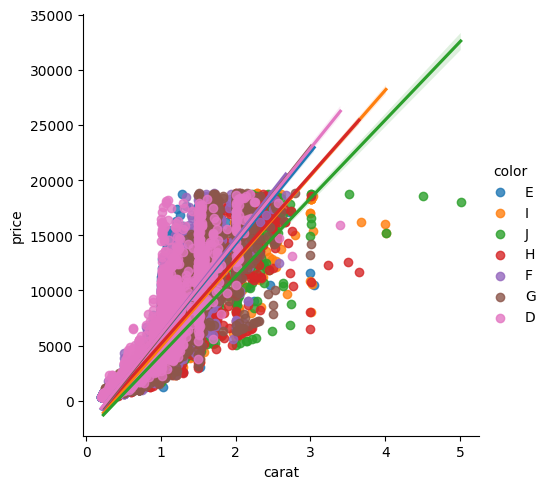

In [100]:
sns.lmplot(x='carat',y='price', data=diamond_base, hue='color')

## Data Cleaning


In [ ]:
diamond_base['carat']

## Model

### Test 
1.  Caract | Error: 2380375.23
2.  Caract, X, Y and Z |  2304689.77

In [91]:
diamond_rick = read_from_gsheets('https://docs.google.com/spreadsheets/d/1USu1MrCp2zMwVyH6-Zs8cInMMLsnrtcb-q5X4j96Srk/edit?usp=sharing')
diamond_rick.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18


In [106]:
X = diamond_base[['carat','x','y','z']]
X_rick = diamond_rick[['carat','x','y','z']]
y = diamond_base[['price']]


In [107]:
model = LinearRegression()

In [108]:
model.fit(X,y)

LinearRegression()

In [111]:
y_previsto = model.predict(X_rick)

len(y_previsto)

5000

In [114]:
diamond_rick["price_predicted"] = y_previsto
diamond_rick

,carat,cut,color,clarity,depth,table,x,y,z,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,4629.237915
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,823.075385
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,1668.698472
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,6054.186793
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,16204.981505
...,...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.2,59.0,4.25,4.30,2.66,416.906893
4996,0.51,Ideal,F,VVS2,61.9,56.0,5.09,5.14,3.16,1673.812751
4997,1.01,Very Good,F,SI1,60.6,60.0,6.37,6.43,3.88,5457.233120
4998,0.31,Ideal,F,VVS1,62.1,56.0,4.35,4.38,2.71,415.189066


In [119]:
diamond_rick.to_csv('previsao.csv',index=False)